<b>Конкурентность</b>
Конкурентность относится к способности программы выполнять несколько задач 
параллельно, но не обязательно одновременно. 
В Python конкурентность часто реализуется с помощью потоков (threads) или асинхронного программирования (asyncio).

<b>Потоки (Threads)</b>
Модуль threading позволяет запускать несколько потоков внутри одного процесса. 
Это удобно для задач, связанных с вводом-выводом 
(I/O-bound), таких как работа с файлами, сетевыми запросами и т.д.

Пример использования потоков:

In [2]:
import threading
import time

def worker(name):
    print(f'thread {name} start to work')
    time.sleep(2)
    print(f'thread {name} stop to work')

threads = []
for i in range(3):
    t = threading.Thread(target=worker, args=(f'Thread-{i}', ))
    threads.append(t)
    t.start()

for t in threads:
    t.join()

thread Thread-0 start to workthread Thread-1 start to work

thread Thread-2 start to work
thread Thread-1 stop to work
thread Thread-0 stop to work
thread Thread-2 stop to work


In [ ]:
Особенности:

Потоки делят одно пространство памяти, что облегчает обмен данными между ними.
Из-за GIL (см. ниже) потоки в Python не обеспечивают истинного параллелизма для задач, требующих 
    интенсивных вычислений.

<b>Асинхронное программирование (asyncio)</b>
Модуль asyncio позволяет писать асинхронный код, который может эффективно управлять большим количеством 
задач ввода-вывода без 
необходимости создавать отдельные потоки или процессы.

Пример использования asyncio:

In [5]:
import asyncio
async def worker(name):
    print(f'thread {name} start to work')
    time.sleep(2)
    print(f'thread {name} stop to work')

async def main():
    tasks = [worker(f'Thread-{i}') for i in range(3)]
    await asyncio.gather(*tasks)

#if __name__ == "__main__":
#    asyncio.run(main())
await(main())


    

thread Thread-0 start to work
thread Thread-0 stop to work
thread Thread-1 start to work
thread Thread-1 stop to work
thread Thread-2 start to work
thread Thread-2 stop to work


<b>Параллелизм</b>
Параллелизм подразумевает одновременное выполнение нескольких задач на разных ядрах процессора. 
В Python параллелизм достигается
с помощью процессов, поскольку каждый процесс имеет свой собственный интерпретатор и память, обходя ограничения GIL.

Многопроцессность (Multiprocessing)
Модуль multiprocessing позволяет создавать отдельные процессы, которые могут выполняться параллельно
на разных ядрах.

Пример использования multiprocessing:

In [5]:
from multiprocessing import Process
import time

def worker(name):
    print(f'process {name} start to work')
    time.sleep(2)
    print(f'process {name} stop to work')

processes = []
for i in range(3):
    p = Process(target = worker, args=("dfgb"))
    processes.append(p)
    p.start()

for p in processes:
    p.join()

<b>Глобальная блокировка интерпретатора (GIL)</b>
Одной из ключевых особенностей Python (особенно CPython) является GIL — механизм, который предотвращает 
одновременное выполнение нескольких потоков байт-кода Python. Это означает, что даже если у вас несколько потоков, только один из них выполняется 
в каждый момент времени. GIL ограничивает эффективность многопоточных программ для CPU-bound задач, но не влияет на I/O-bound задачи.

Влияние GIL:

I/O-bound задачи: Потоки все равно могут быть полезны, так как большая часть времени тратится на ожидание ввода-вывода.
CPU-bound задачи: Для повышения производительности лучше использовать многопроцессность.
Выбор между конкурентностью и параллелизмом
I/O-bound задачи: Рекомендуется использовать многопоточность (threading) или асинхронное программирование (asyncio).
CPU-bound задачи: Рекомендуется использовать многопроцессность (multiprocessing).

<b>I/O-bound и CPU-bound задачи в Python</b>
В программировании задачи часто классифицируют как I/O-bound (зависимые от ввода-вывода) или CPU-bound (зависимые от процессора). 
Понимание различий между ними критично для выбора подходящих инструментов и методов оптимизации в Python.

I/O-bound задачи
I/O-bound задачи — это те, которые ограничены скоростью операций ввода-вывода. Такие задачи проводят большую часть времени в ожидании 
завершения операций чтения/записи данных, сетевых запросов, работы с файлами и т.д.

<b>Примеры I/O-bound задач:</b>

Обработка сетевых запросов (например, веб-серверы)
Чтение и запись файлов на диск
Взаимодействие с базами данных
Ожидание ответов от внешних API
Особенности:

Время выполнения задачи определяется временем ожидания операций ввода-вывода.
Такие задачи могут эффективно использовать конкурентные подходы, такие как многопоточность или асинхронное программирование, для улучшения производительности.
Пример использования asyncio для I/O-bound задачи:

<b>CPU-bound задачи</b>
CPU-bound задачи — это задачи, которые требуют интенсивных вычислений и максимально используют возможности процессора. 
Время выполнения таких задач определяется скоростью обработки данных процессором.

Примеры CPU-bound задач:

Обработка изображений и видео
Криптографические вычисления
Машинное обучение и научные вычисления
Сложные математические расчёты
Особенности:

Такие задачи требуют эффективного использования процессорных ресурсов.
Для повышения производительности лучше использовать параллелизм, например, многопроцессность, 
чтобы задействовать несколько ядер процессора.


In [ ]:
import asyncio
import aiohttp

async def fetch_url(session, url):
    async with session.get(url) as response:
        return await response.text()

async def main():
    urls = [
        ..,
        ...,
        ...
    ]

    async with aiohttp.ClientSession() as session:
        tasks = [fetch_url(session, url) for url in urls]
        content = await asyncio.gather(*tasks)
        for content in contents:
            print(...)

if __name__ == "__main__":
    asyncio.run(main())



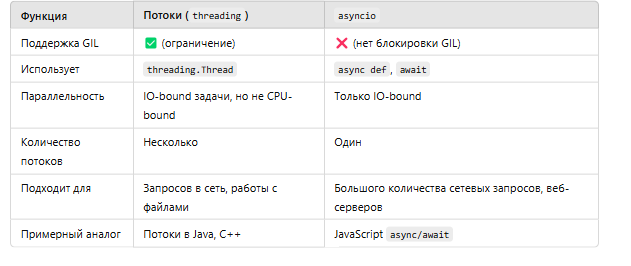

<b>Влияние GIL на выбор подхода</b>
GIL (Global Interpreter Lock) в CPython ограничивает выполнение байт-кода Python одним потоком одновременно. 
Это означает, что многопоточность 
не может эффективно использовать несколько ядер процессора для CPU-bound задач. Поэтому для таких задач 
предпочтительнее использовать многопроцессность.

Однако для I/O-bound задач GIL не является серьезным ограничением, поскольку большая часть времени 
тратится на ожидание ввода-вывода,
и другие потоки могут выполняться во время этого ожидания.

In [ ]:
from multiprocessing import Pool
import math

def compute_factorial(n):
    return math.factorial(n)

if __name__ == '__main__':
    numbers = [100,200,300]
    with Pool(processes=3) as pool:
        results = pool.map(compute_factorial, numbers)
    for num, fuct in  zip(numbers, results):
        print(...)


<b>Запуск потоков и использование блокировок в Python</b>
В Python модуль threading предоставляет инструменты для работы с потоками и управления синхронизацией между ними.
В этом разделе мы рассмотрим, как запускать потоки, использовать блокировки (Locks) для предотвращения гонок данных и 
управлять доступом к разделяемым ресурсам.

Запуск потоков
Для создания и запуска потоков в Python используется класс Thread из модуля threading. Каждый поток выполняет 
определенную функцию или метод.

<b>Блокировки (Locks)</b>
При работе с несколькими потоками важно контролировать доступ к разделяемым ресурсам
(например, переменным, файлам, базам данных), 
чтобы избежать гонок данных (race conditions). Для этого используются блокировки.

Пример использования Lock для предотвращения гонок данных:

In [ ]:
import threading
counter = 0

lock = threading.Lock()

def inc():
    global counter
    for _ in range(10000):
        with lock:
            counter += 1
#        lock.acquire()
#        try:
#            counter += 1
#        finally:
#            lock.release()

thread1 = threading.Thread(target=inc)
thread2 = threading.Thread(target=inc)

thread1.start()
thread2.start()

thread1.join()
thread2.join()
            




In [ ]:
Использование контекстного менеджера with для работы с блокировками:

Блокировки можно использовать с помощью контекстного менеджера with, что делает код более читаемым и безопасным.

<b>Другие механизмы синхронизации</b>
Помимо Lock, модуль threading предоставляет другие инструменты для синхронизации потоков:

RLock (Reentrant Lock): Позволяет одному и тому же потоку несколько раз захватывать блокировку без блокировки самого себя.

In [6]:
import threading
rlock = threading.RLock()

def recursive_function(n):
    with rlock:
        if n>0:
            recursive_function(n-1)

thread = threding.Thread(target = recursive_function, args=(3,))
thread.start()
thread.join()


NameError: name 'threding' is not defined

<b>Semaphore: Ограничивает количество потоков, которые могут одновременно выполнять определенный блок кода.</b>

In [ ]:
import threading
import time

semaphore = threading.Semaphore(2)

def worker(name):
    with semaphore:
        print("1111")
        time.sleep(2)
        print("2222")

threads = []
for i in range(5):
    t = threading.Thread(target=worker, args=("fffff",))
    threads.append(t)
    t.start()

for t in threads:
    t.join()

print("sdf")


<b>Event: Позволяет одному потоку сигнализировать другим о наступлении определенного события.</b>

In [ ]:
import threading
import time


event = threading.Event()

def waiter():
    event.wait()

def setter():
    time.sleep(3)
    event.set()

thread_wait = threading.Thread(target = waiter)
thread_set = threading.Thread(target = setter)

thread_wait.start()
thread_set.start()
thread_wait.join()
thread_set.join()




<b>Избежание взаимоблокировок (Deadlocks)</b>
Взаимоблокировка происходит, когда два или более потоков ожидают друг друга,
и ни один не может продолжить выполнение. Чтобы избежать взаимоблокировок:

Последовательность захвата блокировок: Всегда захватывайте блокировки в одном и том же порядке во всех потоках.

Использование таймаутов: При попытке захватить блокировку можно установить таймаут, 
чтобы избежать бесконечного ожидания.

In [ ]:
import threading
import time


lock1 = threading.Lock()
lock2 = threading.Lock()

def thread1_func():
    while True:
        acquired1 = lock1.acquire(timeout=1)
        if acquired1:
            time.sleep(0.5)
            acquired2 = lock2.acquire(timeout=1)
            if acquired2:
                print("sdf")
                lock2.release()
            lock1.release()
            break
        else:
            print("sdgsdg")

def thread2_func():
    while True:
        acquired2 = lock2.acquire(timeout=1)
        if acquired2:
            time.sleep(0.5)
            acquired1 = lock1.acquire(timeout=1)
            if acquired1:
                print("sdf")
                lock1.release()
            lock2.release()
            break
        else:
            print("sdgsdg")

t1=threading.Thread(target=thread1_func)
t2=threading.Thread(target=thread2_func)
t1.start()
t2.start()
t1.join()
t2.join()




<b>Практические рекомендации</b>
Минимизируйте область действия блокировок: Захватывайте блокировки только на время, 
необходимое для защиты критической секции.

Используйте высокоуровневые синхронизаторы: Иногда использование таких инструментов, 
как Queue, может упростить синхронизацию между потоками.

In [ ]:
import threading
import queue
import time

q = queue.Queue()
def producer():
    for i in range(5):
        item = f'time-{i}'
        q.put(item)
        print(f'make {item}')
        time.sleep(1)

def consumer():
    while True:
        item = q.get()
        if item is None:
            break
        print(f'consume {item}')
        q.task_done()

thread_producer = threading.Thread(target = producer)
thread_consumer = threading.Thread(target = consumer)

thread_producer.start()
thread_consumer.start()
thread_producer.join()
q.put(None)
thread_consumer.join()



<b>Примитивы синхронизации в Python: от Lock до Barrier</b>
В многопоточном программировании примитивы синхронизации играют ключевую роль в управлении доступом 
к разделяемым ресурсам и координации действий между потоками. 
В Python модуль threading предоставляет различные примитивы синхронизации, каждый из которых предназначен для решения 
определённых задач. В этом разделе мы рассмотрим основные примитивы синхронизации: Lock, RLock, Semaphore,
BoundedSemaphore, Event, Condition и Barrier.

<b>1. Lock (Блокировка)</b>
Описание: Lock — самый простой примитив синхронизации, который обеспечивает взаимное исключение (mutex). 
Он позволяет только 
одному потоку владеть блокировкой в любой момент времени, предотвращая доступ других потоков к защищённому ресурсу.

<b>2. RLock (Рекурсивная блокировка)</b>
Описание: RLock (Reentrant Lock) позволяет одному и тому же потоку несколько раз захватывать блокировку без блокировки самого себя. 
Это полезно в случаях, когда функция, захватывающая блокировку, вызывает другую функцию, которая также пытается захватить ту же блокировку.

Использование:

<b>3. Semaphore (Семафор)</b>
Описание: Semaphore ограничивает количество потоков, которые могут одновременно выполнять определённый блок кода или иметь доступ к ресурсу.
Это полезно для ограничения количества одновременных подключений к базе данных, доступов к файлам и т.д.

Использование:

<b>4. BoundedSemaphore (Ограниченный семафор)</b>
Описание: BoundedSemaphore — разновидность Semaphore, которая предотвращает превышение начального значения счётчика. 
Это помогает обнаружить ошибки, связанные с некорректным освобождением семафора.

Использование:

In [ ]:
import threading
bounded_semaphore = threading.BoundedSemaphore(2)

def worker(name):
    bounded_semaphore.acquire()
    try:
        # some task
        pass
    finally:
        bounded_semaphore.release()

threads = []

for i in range(3):
    t = threading.Thread(target=worker, args = (f'Thread-{i}',))
    threads.append(t)
    t.start()

for t in threads:
    t.join()




<b>5. Event (Событие)</b>
Описание: Event используется для сигнализации между потоками. Один поток может установить событие, а 
другие потоки, ожидающие этого события, продолжат выполнение.

Использование:

<b>6. Condition (Условие)</b>
Описание: Condition предоставляет более сложный механизм синхронизации, 
позволяя потокам ждать определённых условий и 
уведомлять другие потоки о наступлении этих условий. Часто используется для реализации 
паттерна "производитель-потребитель".

Использование:

In [ ]:
import threading
import time

condition = threading.Condition()
queue = []
def producer():
    with condition:
        queue.append(1)
        condition.notify()

def consumer():
    with condition:
        while not queue:
            condition.wait()

        queue.pop(0)

producer_thread = threading.Thread(target=producer)
consumer_thread = threading.Thread(target=consumer)

consumer_thread.start()
time.sleep(1)
producer_thread.start()

producer_thread.join()
consumer_thread.join()

<b>7. Barrier (Барьер)</b>
Описание: Barrier синхронизирует определённое количество потоков, заставляя их ждать, 
пока все потоки не достигнут барьера. После этого все потоки одновременно продолжают выполнение.

Использование:

In [ ]:
import threading
import time

barrier = threading.Barrier(3)

def worker(name):
    time.sleep(randon.uniform(0.5, 2))
    barrier.wait()

threads = []
for i in range(3):
    t = threading.Thread(target=worker, args=("sdf",))
    threads.append(t)
    t.start()
    for t in threads:
        t.join()

In [ ]:
Потокобезопасность, Ограничения Параллелизации и Закон Амдала в Python
В многопоточном программировании на Python важны такие концепции, 
как потокобезопасность, ограничения параллелизации и закон Амдала.
Понимание этих концепций помогает создавать
эффективные, надежные и масштабируемые приложения.

<b>1. Потокобезопасность (Thread Safety)</b>
Потокобезопасность означает, что объект или код корректно работают при одновременном доступе из нескольких потоков 
без возникновения неконсистентного состояния или ошибок. В Python, из-за глобальной блокировки интерпретатора (GIL), потокобезопасность 
имеет свои особенности, но она остаётся критически важной для разработки многопоточных приложений.

<b>Причины Необходимости Потокобезопасности:</b>
Гонки данных (Race Conditions): Возникают, когда несколько потоков одновременно изменяют общий ресурс без надлежащей синхронизации.
Нестабильное Поведение: Неконтролируемый доступ может привести к непредсказуемым результатам и ошибкам.
Способы Обеспечения Потокобезопасности в Python:
Использование Блокировок (Locks): Блокировки позволяют ограничить доступ к критическим секциям кода, обеспечивая, что только один
поток может выполнять эту секцию одновременно.

In [ ]:
Использование Модулей Высокого Уровня (Queue): Модуль queue обеспечивает потокобезопасные очереди, которые автоматически 
управляют синхронизацией между потоками.

In [ ]:
Использование Неизменяемых Объектов: Если объекты неизменяемы (immutable), они безопасны для чтения несколькими потоками 
без необходимости синхронизации.

<b>2. Ограничения Параллелизации</b>
Параллелизация может значительно повысить производительность приложений, но она сталкивается с рядом ограничений, особенно в контексте Python.

Основные Ограничения Параллелизации в Python:
Глобальная Блокировка Интерпретатора (GIL):

Описание: В CPython (стандартная реализация Python) GIL ограничивает выполнение байт-кода Python одним потоком одновременно.
Влияние: Многопоточность не обеспечивает реального параллелизма для CPU-bound задач, так как потоки вынуждены чередоваться в выполнении.
Решение: Для CPU-bound задач лучше использовать многопроцессность (multiprocessing) или альтернативные реализации Python 
без GIL (например, Jython, IronPython).
Зависимости Между Задачами:

Описание: Если задачи зависят друг от друга, параллельное выполнение может быть затруднено.
Пример: Задача B зависит от результата задачи A.
Влияние: Увеличивает время ожидания и может снизить эффективность параллелизации.
Накладные Расходы на Синхронизацию:

Описание: Управление доступом к общим ресурсам требует синхронизации, которая добавляет накладные расходы.
Влияние: Может снизить общую производительность при большом количестве потоков или процессов.
Ограничения Аппаратного Обеспечения:

Ядер Процессора: Количество доступных ядер ограничивает максимальное количество параллельных потоков или процессов.
Память и Другие Ресурсы: Ограничения по памяти и другим ресурсам могут стать узким местом при масштабировании.
Демонстрационные Эффекты (Diminishing Returns):

Описание: По мере увеличения числа потоков или процессов прирост производительности уменьшается и может даже стать отрицательным
из-за накладных расходов.
Пример: При 100 потоках может наблюдаться значительное увеличение накладных расходов по сравнению с 10 потоками.
Пример Ограничений GIL:
Рассмотрим выполнение CPU-bound задачи с использованием потоков и процессов.

<b>Закон Амдала (Amdahl's Law)</b>
Закон Амдала описывает теоретический предел ускорения вычислений при использовании параллельных ресурсов. Он показывает, как ускорение отдельных
частей программы влияет на общее ускорение.

Формула Закона Амдала:
S=1/((1-P)+ P/N)

S: Общий коэффициент ускорения.
P: Доля программы, которая может быть параллелизирована.
N: Количество параллельных исполнителей (например, ядер процессора).
Интерпретация Закона:
Линейное Ускорение: Если вся программа может быть полностью параллелизирована (P = 1), то ускорение
будет линейным: S = N.
Ограничение: Даже при бесконечном количестве параллельных исполнителей, максимальное ускорение
ограничено (1 / (1 - P)).

In [ ]:
https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%90%D0%BC%D0%B4%D0%B0%D0%BB%D0%B0

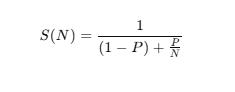